## Principi prezentacije i prepoznavanje oblika

#  Tema projekta - Detekcija godina, pola i emocija

# **Teorijski Deo**

Detekcija lica je ključna tehnologija u oblasti računarskog vida koja se koristi za identifikaciju, praćenje i analizu ljudskih lica u digitalnim slikama i video zapisima.

Često uključuje niz koraka, uključujući lokalizaciju lica na slici, određivanje orijentacije i položaja lica, kao i prepoznavanje različitih karakteristika lica, kao što su oči, nos i usta. Ovi koraci mogu biti izazovni zbog različitih faktora kao što su promenljivo osvetljenje, promene pozadine, senke i različite poze lica.

 **Detekcija godina, pola i emocija** kroz analizu slike postaje sve značajnija u
mnogim aplikacijama, uključujući i oblasti kao što su cloud computing, pametne kamere, robotska percepcija i medicinska dijagnostika. Razumevanje pola i emocija ljudi na slikama može imati širok spektar primena, od personalizovanih marketinških strategija do unapređenja korisničkog iskustva u interaktivnim sistemima.







 Koristeći dataset koji sadrži slike ljudi različitih starosnih grupa, analiziraćemo mogućnosti prepoznavanja godina, pola i emocija na osnovu vizuelnih informacija.



 Kroz analizu slika i upotrebom neuronskih mreža, posebno konvolucionnih neuronskih mreža (**CNN**), koristićemo njihove sposobnosti da efikasno obrađujemo vizuelne podatke. **CNN** su izuzetno efikasni u obradi slika zbog svoje sposobnosti da nauče složene obrasce direktno iz sirovih piksela. Takođe, **CNN** mogu automatski izdvojiti relevantne karakteristike iz slike, što ih čini pogodnim za zadatke kao što su detekcija pola, emocija i godina na osnovu lica.

 U našem primeru možemo koristiti **CNN** kako bi automatski prepoznao karakteristike vezane za godine ljudi, tj koje karakteristike imaju odredjeni rasponi godina i klasifikovao bi njih na osnovu toga.

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Učitavanje VGG-Face modela, koji je baziran na ImageNet slikama
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Zamrzavanjem slojeva, unapređujemo model sa našim setom trening slika

for layer in base_model.layers:
    layer.trainable = False

# Na slojeve modela dodajemo naš sloj.
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)

# Kombinovanje modela sa našim novim slojem.
model = Model(inputs=base_model.input, outputs=predictions)

# Kompilacija modela pomoću Adam optimizatora koji je preporučen za rad sa slikama
# lr predstavlja stopu učenja odnosno koliko će model pomerati varijacije prilikom računanja funkcije gubitka (tako da gubitak bude minimiziran).
# categorical_crossentropy je popularna funkcija gubitka (loss function) koja se koristi u klasifikacionim problemima sa više od dve klase.
# Kada imamo problem klasifikacije sa više od dve klase, kao što je slučaj sa detekcijom godina u ovom primeru,
# kategoricna unakrsna entropija je često korišćena funkcija gubitka. Ona meri razliku između raspodele verovatnoća predviđenih modelom i stvarnih raspodela verovatnoća ciljnih klasa.
# Kako se model trenira, ova funkcija gubitka pomaže modelu da minimizira tu razliku, što dovodi do boljih performansi u klasifikaciji.



# Kao metrika evaluacije modela izabrana je tačnost umesto preciznosti, zato što su prosleđene slike balansirane (isto je zastupljena svaka klasa tj. raspon godina)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Menjanje podataka
train_datagen = ImageDataGenerator(
    rescale=1./255, #Normalizovanje pixela slike na vrednosti između 0 i 1
    shear_range=0.2, #Svaka slika će se nagnuti za 0.2 radijana
    zoom_range=0.2, #Svaka slika će se uvećati ili smanjiti za 20%
    horizontal_flip=True #Postoji 50% šansa da će se slike horizontalno rotirati i imati efekat ogledala.
)
# Ovi  parametri se primenjuju u svakoj epohi treniranja modela

# Učitvanje slika koje se koriste za treniranje
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Treniranje modela
model.fit(
    train_generator,
    epochs=15,  # Broj epoha
    steps_per_epoch=len(train_generator), #Broj koraka u jednoj epohi, odnosno iteracija uzimanja svih slika i pokretanja mreže (i naravno ažuriranje modela na osnovu rezultata predikcija)
    verbose=1
)

# Čuvanje modela
model.save('age_detection_model.h5')


Found 125 images belonging to 5 classes.
Epoch 1/15
4/4 [==============================] - 87s 21s/step - loss: 1.6595 - accuracy: 0.2000
Epoch 2/15
4/4 [==============================] - 91s 21s/step - loss: 1.6257 - accuracy: 0.2160
Epoch 3/15
4/4 [==============================] - 79s 17s/step - loss: 1.5908 - accuracy: 0.2720
Epoch 4/15
4/4 [==============================] - 76s 17s/step - loss: 1.5738 - accuracy: 0.3280
Epoch 5/15
4/4 [==============================] - 77s 18s/step - loss: 1.5605 - accuracy: 0.3120
Epoch 6/15
4/4 [==============================] - 78s 18s/step - loss: 1.5326 - accuracy: 0.4240
Epoch 7/15
4/4 [==============================] - 78s 18s/step - loss: 1.5156 - accuracy: 0.3440
Epoch 8/15
4/4 [==============================] - 76s 18s/step - loss: 1.5076 - accuracy: 0.3840
Epoch 9/15
4/4 [==============================] - 79s 18s/step - loss: 1.4830 - accuracy: 0.4880
Epoch 10/15
4/4 [==============================] - 76s 18s/step - loss: 1.4737 - accur

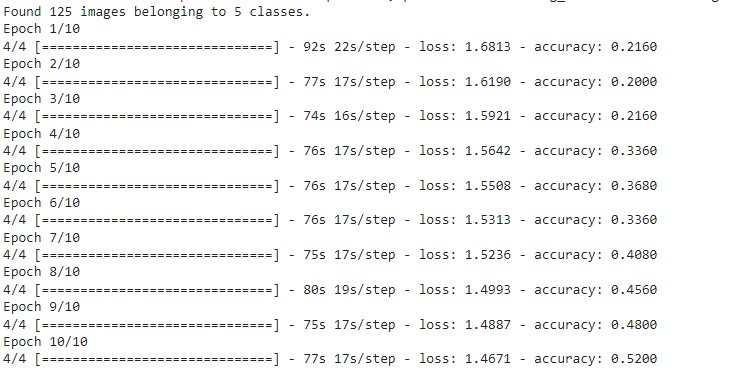

**Rezultati obuke**



*   Gubitak (loss) se smanjuje tokom epoha, što ukazuje na to da se model postepeno poboljšava u proceni godina na osnovu slika.
*   Tačnost (accuracy) se povećava tokom epoha, što sugeriše da model postaje bolji u klasifikaciji slika u odgovarajuće kategorije godina.

Na osnovu rezultata obuke, možemo primetiti da je model postigao umerenu tačnost od oko 50% na trening skupu podataka.Međutim, ovi rezultati ukazuju i na prostor za poboljšanje.

Važno je napomenuti da je postignuta tačnost, iako umerena, daleko od savršenstva, što sugeriše da model još uvek nije potpuno efikasan u predviđanju godina na osnovu slika.



In [ ]:
#Instalacija biblioteka
!pip install deepface
!pip install opencv-python

1/1 [==============================] - 1s 974ms/step
Predicted Age: 18


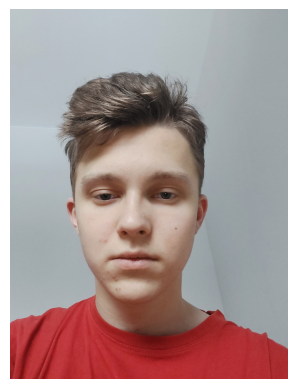

In [ ]:
#Testiranje kreiranog modela
import matplotlib.pyplot as plt
from keras.models import load_model
import cv2
import numpy as np

# Učitavanje modela za detekciju godina
model = load_model('age_detection_model.h5')

# Putanja do testne slike u projektu
test_image_path = '/content/drive/MyDrive/Colab Notebooks/test/18-20/26.jpg'

# Učitavanje testne slike i obrada
img = cv2.imread(test_image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Predikcija godina
predictions = model.predict(img)

# Interpretacija rezultata
predicted_age = np.argmax(predictions) + 18  # Dodajemo 18 jer je model obučen na uzorku koji pokriva godine od 18 do 60

print(f"Predicted Age: {predicted_age}")

# Prikazivanje rezultata (opciono)
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Testni rezultat našeg modela za odredjenu sliku

# Praktični deo

## Pregled podataka


In [ ]:
import zipfile #Za ekstrakciju datoteke
import os #Za kreiranje foldera unutar colaba

zip_file_path = '/content/drive/MyDrive/Colab Notebooks/Material/Faces_Detection.zip'

extract_dir = '/content/drive/MyDrive/Colab Notebooks/Material/'

#Ukoliko folder ne postoji, kreirati ga
os.makedirs(extract_dir, exist_ok=True)

# Ekstrakcija dataset-a
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Lista fajlova (foldera unutar dataseta)
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

Extracted files: ['age_detection.csv', 'train', 'test']


Nakon ekstrakcije primecujemo da imamo foldere train i test.
Oba foldera sadrze subfoldere gde se nalaze odredjeni rasponi godina sem sto u train folderu imamo po 25 slike u svakom dok u test imamo po 5.

Pregledom slika, uočavamo da je dataset već pripremljen za analizu i evaluaciju modela za prepoznavanje lica, što znači da dodatna priprema podataka pre korišćenja nije bila neophodna. Budući da koristimo već istreniran model, nije bilo potrebe za definisanjem meta podataka za svaku sliku.

In [ ]:
#Pregled foldera
train_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Material/train')
print("Files in train:", train_files)
validation_files = os.listdir('/content/drive/MyDrive/Colab Notebooks/Material/test')
print("Files in validation:", validation_files)

Files in train: ['51-60', '41-50', '31-40', '21-30', '18-20']
Files in validation: ['51-60', '41-50', '31-40', '21-30', '18-20']


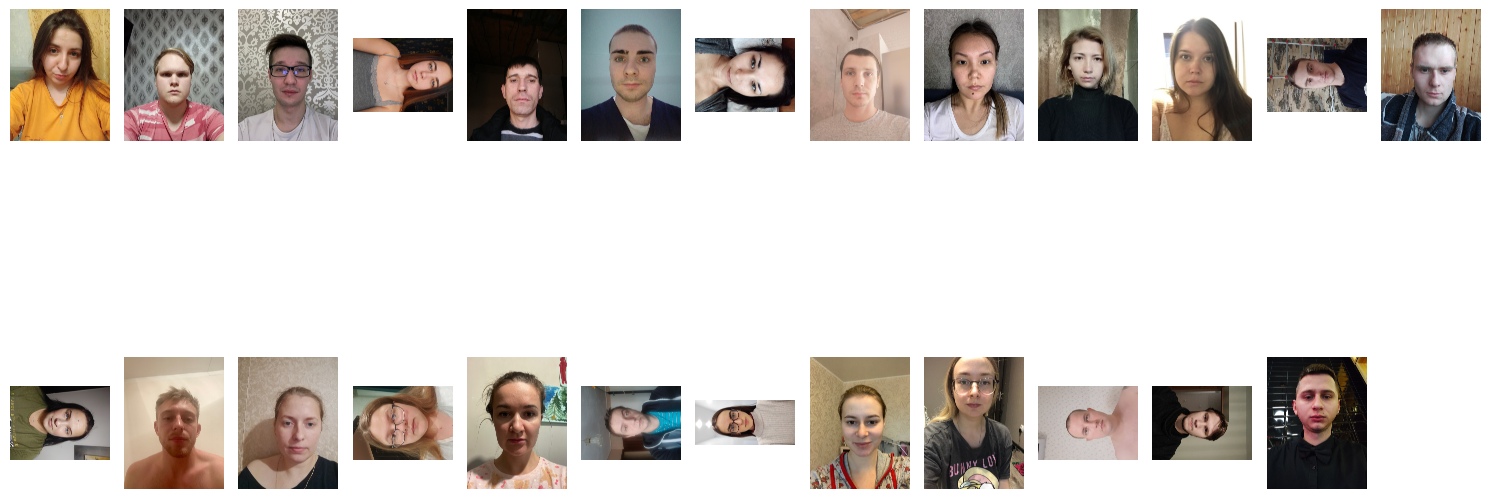

In [ ]:
import matplotlib.pyplot as plt
import os

# folder_path = putanja do foldera sa slikama za određene osobe
folder_path = '/content/drive/MyDrive/Colab Notebooks/train/21-30'

# Provera da li postoji folder sa zadatom putanjom
if os.path.exists(folder_path):
    # Lista svih fajlova unutar foldera
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    # Postavljanje veličine grafa na osnovu broja slika u folderu
    num_images = len(image_files)
    num_rows = 2  # Broj redova
    num_cols = (num_images + num_rows - 1) // num_rows  # Broj kolona
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

    # Iteriranje kroz svaku sliku i prikazivanje
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = plt.imread(image_path)

        # Prikaz slike na odgovarajućem mestu u grafu
        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(image)
        axes[row, col].axis('off')

    # Podešavanje rasporeda slika
    for ax in axes.flat[num_images:]:
        ax.axis('off')
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("Folder ne postoji.")


## Primena Modela

Detected faces: 1


Action: emotion: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]


Results: [{'gender': {'Woman': 99.92077946662903, 'Man': 0.07922212244011462}, 'dominant_gender': 'Woman', 'region': {'x': 433, 'y': 452, 'w': 1198, 'h': 1198, 'left_eye': (772, 920), 'right_eye': (1227, 907)}, 'face_confidence': 0.93, 'age': 29, 'emotion': {'angry': 0.14159094687720816, 'disgust': 4.251681482725824e-07, 'fear': 0.5858462187407147, 'happy': 0.0003980497022772263, 'sad': 2.742970153270373, 'surprise': 0.00582593236850544, 'neutral': 96.52336815138865}, 'dominant_emotion': 'neutral'}]


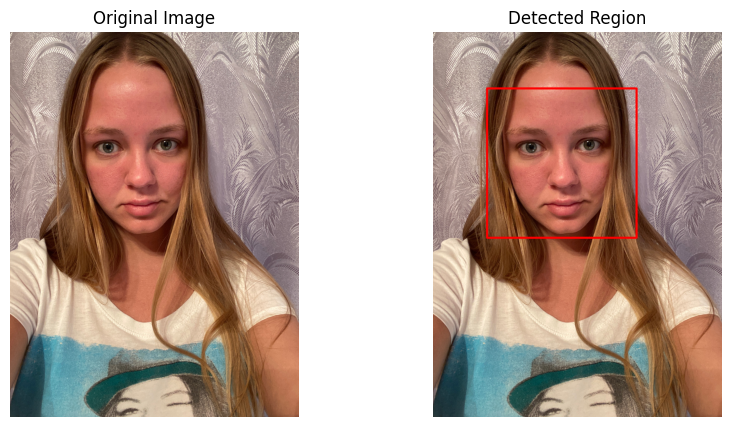

In [ ]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

# Putanja do slike koju želite da testirate
image_path = '/content/drive/MyDrive/Colab Notebooks/test/18-20/25.jpg'

# Učitavanje slike
original_img = cv2.imread(image_path)
img_with_region = original_img.copy()

# Detekcija lica u slici korišćenjem OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
gray = cv2.cvtColor(img_with_region, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Prikaz broja detektovanih lica
print("Detected faces:", len(faces))

# Izdvajanje informacija o polu, dobi i emociji
results = DeepFace.analyze(image_path, actions=["gender", "age", "emotion"])
print("Results:", results)

# Izdvajanje informacija o detektovanom licu
if len(faces) > 0:
    # Izdvajanje informacija o detektovanom licu
    region = {'x': faces[0][0], 'y': faces[0][1], 'w': faces[0][2], 'h': faces[0][3]}

    # Nacrtaj pravougaonik na slici
    x, y, w, h = region['x'], region['y'], region['w'], region['h']
    cv2.rectangle(img_with_region, (x, y), (x + w, y + h), (0, 0, 255), 16)

# Prikaz originalne i modifikovane slike
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
axes[0].axis('off')
axes[0].set_title('Original Image')

axes[1].imshow(cv2.cvtColor(img_with_region, cv2.COLOR_BGR2RGB))
axes[1].axis('off')
axes[1].set_title('Detected Region')

plt.show()


Sada mozemo testirati celokupan folder i videti kakvi su rezultati

Action: gender: 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]


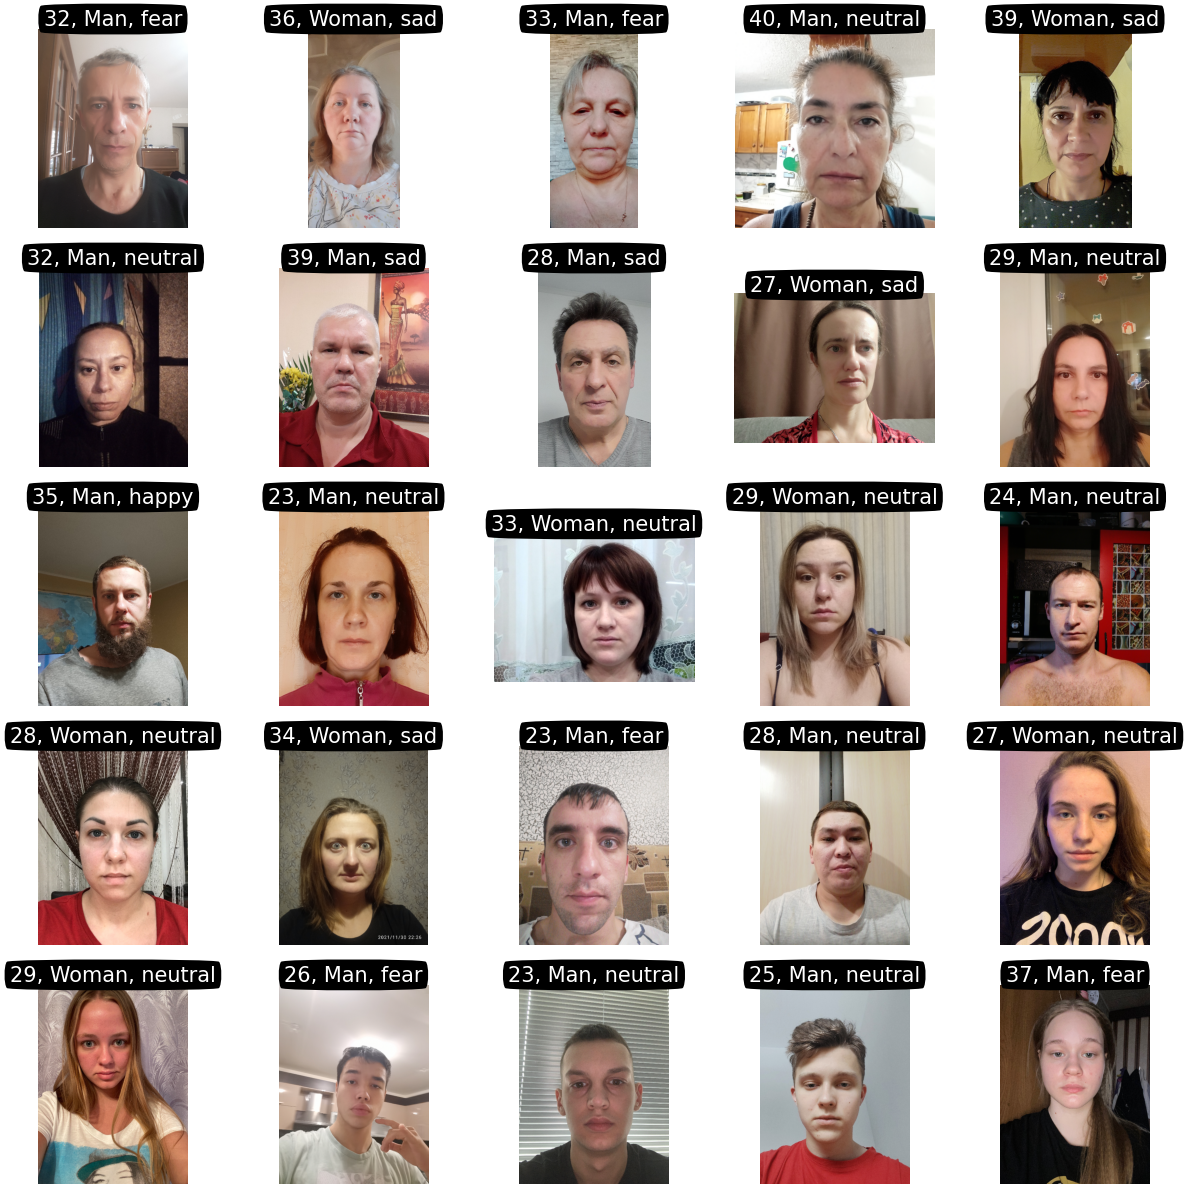

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from glob import glob

# Lista svih slika unutar foldera 'sveSlike'
image_files = glob('/content/drive/MyDrive/Colab Notebooks/test/**/*.jpg', recursive=True)

num_columns = 5  # 5 kolona za 25 slika
num_rows = 5  # 5 redova

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))  # 15x15 inch-a

j = 0

# Za svaku putanju slike...
for img_file in image_files:
    img = cv2.cvtColor(cv2.imread(img_file), cv2.COLOR_BGR2RGB)  # Učitaj sliku u originalnoj boji radi prikaza na grafu

    img_h, img_w, _ = img.shape  # Sa obzirom da je sada slika učitana kao numpy niz, prva vrednost je visina, druga je širina, treća je spektar boje (- ignoriše spektar boje, zato što je već podešen)

    r = 640 / max(img_h, img_w)  # Standardizacija veličine slike (u ovom koraku se pamti razmera rezolucije,
    # slika se standardizuje tako da pre prosleđivanja modelu slike budu iste veličine)
    img = cv2.resize(img, (int(img_w * r), int(img_h * r)))

    results = DeepFace.analyze(img_file, actions=['age', 'emotion', 'gender'], enforce_detection=False)  # Ukoliko deepface ne može detektovati lice, izvršavanje se nastavlja.

    # Prvi rezultat u nizu predstavlja rezultat predikcije za trenutnu sliku u iteraciji, pristupamo vrednostima koje smo dobili
    predicted_gender = results[0]['dominant_gender']
    predicted_age = results[0]['age']
    predicted_emotion = results[0]['dominant_emotion']

    # Kreiranje labele radi prikaza rezultata
    label = "{}, {}, {}".format(int(predicted_age), predicted_gender, predicted_emotion)

    text_x = j // num_columns
    text_y = j % num_columns

    # Tekst + pozadinska boja
    axes[text_x, text_y].text(
        0.5, 1.05, label, fontsize=15, color='white',
        bbox=dict(facecolor='black', alpha=1, edgecolor='none', boxstyle='round4'),
        transform=axes[text_x, text_y].transAxes, ha='center', va='center'
    )
    axes[text_x, text_y].imshow(img)
    axes[text_x, text_y].axis('off')
    j += 1

plt.show()


## Zakljucak na osnovu novih rezultata

Na osnovu rezultata vidimo da je najveci problem prilikom identifikovanja godina na osnovu slike, raspon godina varira od 20-40, sto je i najveci deo raspona ali ne hvata vece ekstreme poput 18-20 i 51-60.
Najbolje rezultati su sto se tice emocija prikazanih na slici, dok je pol uglavnom tacan sa nekim izuzecima (5 promasenih, 80 posto pogodjenih).

Ovo moze biti rezultat nedovoljne kolicine slika za treniranje kao i kvalitet dataseta Deepface modela.

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]



Dominant Gender: Man
Predicted Age: 37
Dominant Emotion: fear


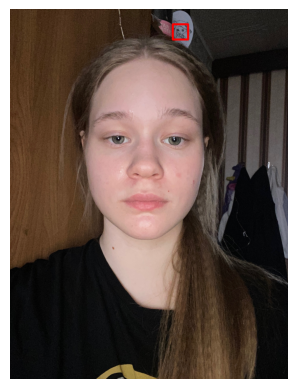

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Colab Notebooks/test/18-20/27.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = DeepFace.analyze(image_path, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

face_coordinates = results[0]['region']

cv2.rectangle(img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 16)

plt.imshow(img)
plt.axis('off')
plt.show()



---


## *Najvece odstupanje jeste ova slika, gde nista nije pogodjeno od strane modela.*

---






Action: gender: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]



Dominant Gender: Man
Predicted Age: 25
Dominant Emotion: neutral


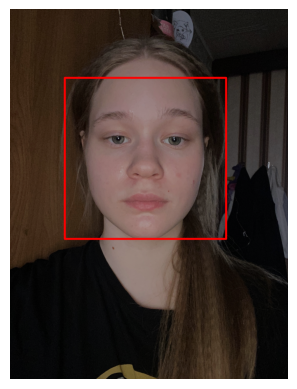

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Učitavanje slike
image_path = '/content/drive/MyDrive/Colab Notebooks/test/18-20/27.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Povećanje osvetljenja slike
brightness_factor = 0.7
brightened_img = np.clip(img * brightness_factor, 0, 255).astype(np.uint8)

# Povećanje verovatnoće detekcije lica
results = DeepFace.analyze(brightened_img, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

# Crveni pravougaonik oko detektovanog lica
face_coordinates = results[0]['region']
cv2.rectangle(brightened_img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 16)

# Prikaz slike sa označenim licem
plt.imshow(brightened_img)
plt.axis('off')
plt.show()


# **Mogućnost poboljšanja rezultata**


Mozemo primetiti da u prethodnom pokusaju lice cak nije ni detektovano korektno, sto nam ukazuje na sam kvalitet slika koji je koriscen prilikom treniranja modela, ali manipulisanjem slika poput sada ( menjanje osvetljenja) mozemo povecati njegovu tacnost u svim poljima.

Sada je pogodjeno raspolozenje i broj godina je mnogo blizu stvarnom rasponu.

Moguće je postići bolje rezultate koristeći druge tehnike manipulacije slika, kako bi model bio precizniji.

Action: gender: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]



Dominant Gender: Woman
Predicted Age: 27
Dominant Emotion: neutral


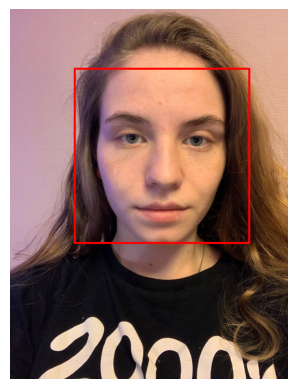

In [ ]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Colab Notebooks/test/21-30/29.jpg'
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


results = DeepFace.analyze(image_path, actions=['age', 'emotion', 'gender'], enforce_detection=False)

print(f"\nDominant Gender: {results[0]['dominant_gender']}")
print(f"Predicted Age: {results[0]['age']}")
print(f"Dominant Emotion: {results[0]['dominant_emotion']}")

face_coordinates = results[0]['region']

cv2.rectangle(img, (int(face_coordinates['x']), int(face_coordinates['y'])),
              (int(face_coordinates['x'] + face_coordinates['w']), int(face_coordinates['y'] + face_coordinates['h'])), (255, 0, 0), 16)

plt.imshow(img)
plt.axis('off')
plt.show()



---


### *Primer gde je model adekvatno dodelio godine, pol i raspolozenje*

---



# **Uporedjivanje**

---



Neka uporedimo nas kreiran model na startu koji odredjuje godine na osnovu slika, sa Deepface-om.

1/1 [==============================] - 0s 489ms/step


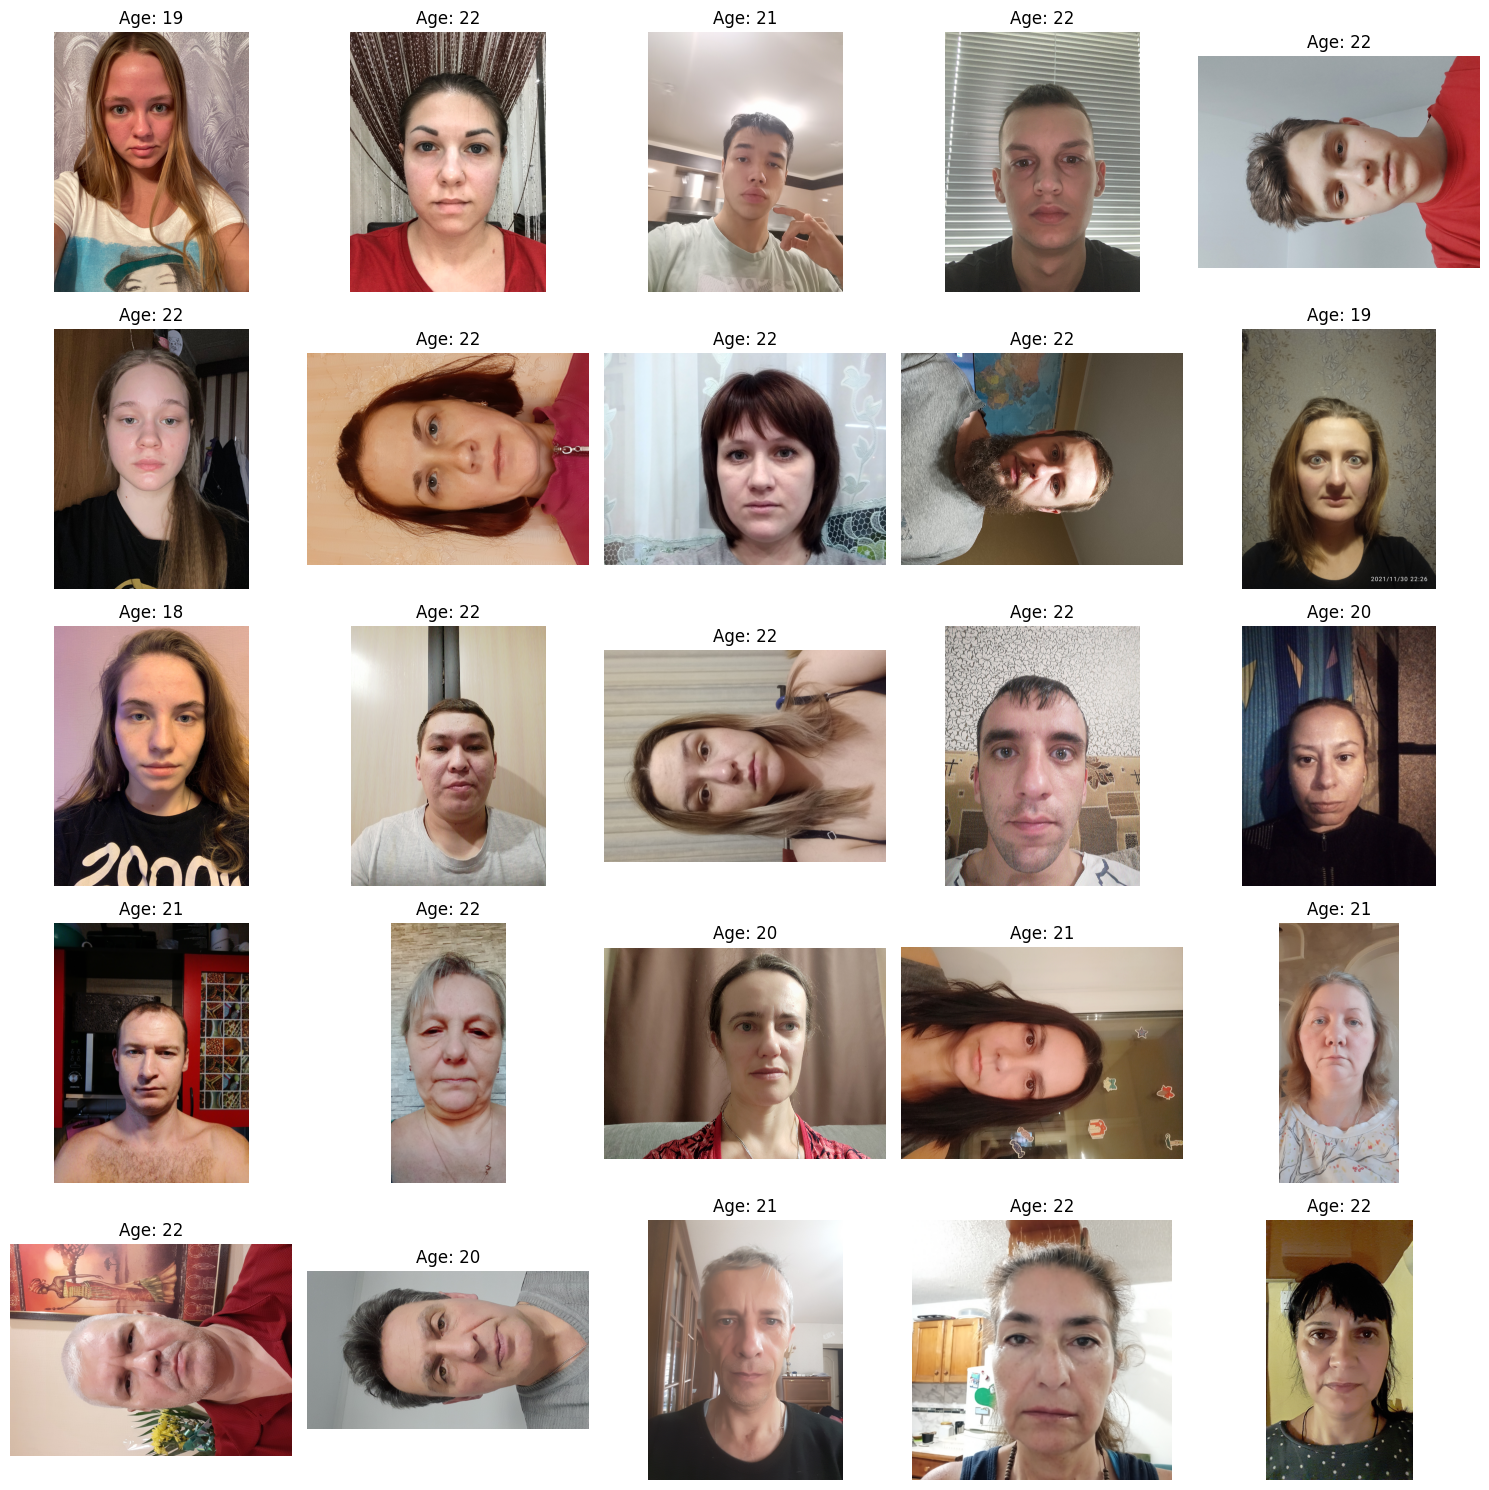

In [ ]:
from keras.models import load_model
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

# Učitavanje modela za detekciju godina
age_model = load_model('age_detection_model.h5')

# Putanje do slika
image_files = glob('/content/drive/MyDrive/Colab Notebooks/test/**/*.jpg', recursive=True)

# Postavljanje veličine figure za prikaz slika
num_images = len(image_files)
num_columns = 5
num_rows = 5
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 15))

# Iteriranje kroz sve slike i prikazivanje rezultata
for j, img_file in enumerate(image_files):
    # Učitavanje slike
    img = image.load_img(img_file, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Predikcija godina
    predictions = age_model.predict(img)
    predicted_age = np.argmax(predictions[0]) + 18  # Dodajemo 18 jer je model treniran na podacima sa minimalnom godinom od 18

    # Prikaz slike i rezultata predikcije
    axes[j // num_columns, j % num_columns].imshow(image.load_img(img_file))
    axes[j // num_columns, j % num_columns].set_title(f'Age: {predicted_age}')
    axes[j // num_columns, j % num_columns].axis('off')

plt.tight_layout()
plt.show()


# **Rezultat našeg modela za detekciju godina**

 Primećujemo da model ima dosta više grešaka nego sam DeepFace. Ovo može biti rezultat nedovoljnih količina slika u folderima sa godinama.
 Primetno je da model deli broj godina u jako malom rasponu i to sve u najmanjem (18 do 22 ).




# **Poredjenje preciznosti izmedju oba modela**

---



In [ ]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

model = load_model('age_detection_model.h5')  # Učitavanje modela za detekciju godina

test_datagen = ImageDataGenerator(rescale=1./255)  # Normalizacija slika

test_generator = test_datagen.flow_from_directory(
   '/content/drive/MyDrive/Colab Notebooks/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',  # Postavljamo class_mode na 'categorical' jer imamo više klasa (raspona godina)
    shuffle=False
)

eval_result = model.evaluate(test_generator)

accuracy = eval_result[1]

print(f'Accuracy: {accuracy * 100:.2f}%')


Found 25 images belonging to 5 classes.
1/1 [==============================] - 38s 38s/step - loss: 1.5387 - accuracy: 0.2000
Accuracy: 20.00%


In [ ]:
import os
from glob import glob
from deepface import DeepFace

test_dir = '/content/drive/MyDrive/Colab Notebooks/test'

correct_predictions = 0
total_images = 0

# Iteracija kroz sve slike u test folderu i njenim subfolderima
for image_file in glob('/content/drive/MyDrive/Colab Notebooks/test/**/*.jpg', recursive=True):
    image_path = os.path.join(test_dir, image_file)

    # Analiza slike pomoću DeepFace
    results = DeepFace.analyze(image_path, actions=['age'], enforce_detection=False)

    # Pribavljanje predviđene godine
    predicted_age = results[0]['age']

    # Pribavljanje stvarnog raspona godina iz putanje slike
    actual_age_range = os.path.basename(os.path.dirname(image_file))
    actual_age_range = actual_age_range.split('-')
    actual_min_age = int(actual_age_range[0])
    actual_max_age = int(actual_age_range[1])

    # Provera da li je predviđena godina unutar stvarnog raspona godina
    if actual_min_age <= predicted_age <= actual_max_age:
        correct_predictions += 1

    total_images += 1

# Izračunavanje tačnosti
accuracy = (correct_predictions / total_images) * 100

# Ispis rezultata
print(f"Accuracy: {accuracy:.2f}%")


Accuracy: 24.00%


# **Zaključak**

Iz rezultata analize modela za detekciju raspona godina na osnovu slika možemo zaključiti da trenutni model nije adekvatan i da postoji prostor za poboljšanje. Evo nekoliko razloga zašto model nije efikasan i predloge za poboljšanje:




*   **Niska tačnost**: Model je pokazao nisku tačnost u predikciji raspona godina na osnovu slika. Ovo može biti posledica nekoliko faktora, uključujući nedostatak dovoljno raznovrsnih trening podataka, nedovoljno složen model ili neprikladne metrike za procenu tačnosti.
*   **Nedostatak reprezentativnih podataka**: Trening set podataka možda ne pokriva dovoljno raznolikih godina ili stilova fotografija, što može dovesti do loših performansi modela prilikom predikcije na novim, neviđenim slikama.



# **Predlozi za poboljšanje**






*   **Obogaćivanje trening skupa podataka**: Dodavanje više raznolikih slika sa različitim starosnim grupama i stilovima fotografija može poboljšati generalizaciju modela i rezultirati boljim performansama na novim podacima.

*   **Optimizacija hiperparametara**: Podešavanje parametara kao što su stopa učenja, broj slojeva i veličina slojeva može značajno poboljšati performanse modela.


*   **Izbor adekvatnije arhitekture modela**: Istraživanje i eksperimentisanje sa različitim arhitekturama modela, posebno onima koje su specifično dizajnirane za zadatke detekcije godina na osnovu slika, može dovesti do boljih performansi.










